<a href="https://colab.research.google.com/github/Yul4ita/DA-course-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%964_Pandas_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [1]:
!pip install mysql-connector-python -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 7.7 MB/s eta 0:00:00


In [48]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

from mysql.connector.connection import MySQLConnection

In [19]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [45]:
sql = """
SELECT YEAR(hire_date) as hire_year, COUNT(emp_no) as emp_num
FROM employees
GROUP BY hire_year
ORDER BY hire_year
"""

df = pd.read_sql(sql, con)
df.head(16)

,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

<Figure size 600x400 with 0 Axes>

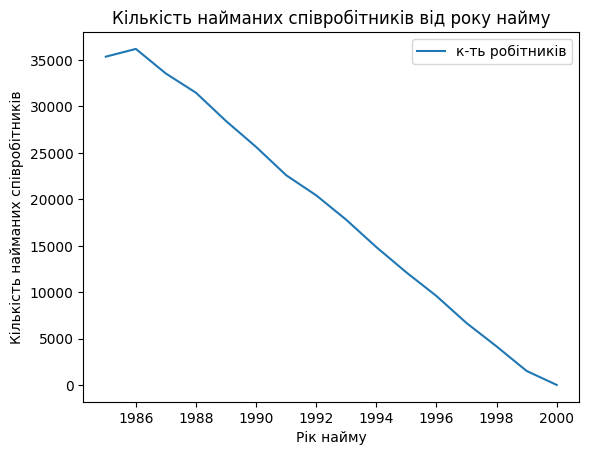

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
df.plot(x='hire_year', y='emp_num', kind='line', label='к-ть робітників')
plt.legend()
plt.title('Кількість найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість найманих співробітників')
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [43]:
import warnings

warnings.filterwarnings('ignore')

In [44]:
sql_2 = """
SELECT from_date, to_date, timestampdiff(year, from_date, to_date) as duration
FROM titles
WHERE title = 'Engineer' AND to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql_2, con)
display(df_years)

,from_date,to_date,duration
0,1986-12-01,1995-12-01,9
1,1990-02-18,1995-02-18,5
2,1992-12-18,2000-12-18,8
3,1987-04-03,1995-04-03,8
4,1995-03-20,2001-03-19,5
...,...,...,...
84015,1989-11-23,1998-11-23,9
84016,1989-07-30,1994-07-30,5
84017,1993-02-22,1993-10-27,0
84018,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

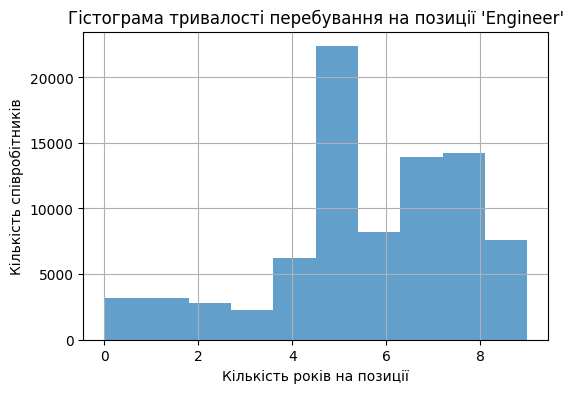

In [54]:
plt.figure(figsize=(6, 4))
plt.hist(df_years['duration'], alpha=0.7)
plt.title("Гістограма тривалості перебування на позиції 'Engineer'")
plt.xlabel("Кількість років на позиції")
plt.ylabel("Кількість співробітників")
plt.grid(True)
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [55]:
con.close()